In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import heapq
1.0 - math.pow(0.9, 1/10)


0.010480741793785553

In [224]:
MAX_ITER = 64

eps = 1.19209e-07

def compute_possibility(n, p, x):
    s = 1.0
    for i in range(x):
        s *= (n - i) / (i + 1)
    s *= (p**x) * ((1-p)**(n-x))
    return s

def bs_next_helper(n, c, t, L, m, p):
    s = 0.0
    for i in range(m+1):
        #print(p, L[i], L[i] + t)
        if p < L[i] - eps or p > L[i] + t + eps:
            continue
        #print("s", s, compute_possibility(n, p, m))
        s += compute_possibility(n, p, i)
    if s >= c:
        return True
    return False

#print(bs_next_helper(10, 0.9, 1.0, [0.0,0.0], 0, 0.0001))

def bs_next(n, c, t, L, i, hq):
    if len(hq) == 0:
        return 1.0
    beg = heapq.heappop(hq)
    while len(hq) > 0:
        end = heapq.heappop(hq)
        #print(end, bs_next_helper(n, c, t, L, i, end))
        if bs_next_helper(n, c, t, L, i, end):
            beg = end
            continue
        #if i == 0:
        #    print("beg:", beg, end)
        for _ in range(MAX_ITER):
            mid = (beg + end) / 2.0
            #print("mid:", mid, L[0], t, c, bs_next_helper(n, c, t, L, i+1, mid))
            if bs_next_helper(n, c, t, L, i, mid):
                beg = mid
            else:
                end = mid
        heapq.heappush(hq, beg)
        heapq.heappush(hq, min(1.0, beg+t))
        heapq.heappush(hq, end)
        return beg
    return 1.0
        

def bci_helper(n, c, t, L):
    for i in range(n+1):
        L[i] = 0.0
    L[0] = 0.0
    #L[1] = 1.0 - math.pow(c, 1/n)
    hq = []
    heapq.heappush(hq, 0.0)
    heapq.heappush(hq, t)
    heapq.heappush(hq, 1.0)
    for i in range(n):
        L[i+1] = bs_next(n, c, t, L, i, hq)
        #print(hq)
    
    tmp = test_bci(n, L, t, 0.01)
    if tmp >= c:
        return True
    #if L[n] + t >= 1.0:
    #    return True
    return False

def compute_binomail_confidence_interval(n, c):
    L = [0.0 for _ in range(n+1)]
    beg = 0.0
    end = 1.0
    for _ in range(MAX_ITER):
        mid = (beg + end) / 2.0
        ok = bci_helper(n, c, mid, L)
        #print(mid, ok)
        if ok:
            end = mid
        else:
            beg = mid
    bci_helper(n, c, end, L)
    return L, [min(1.0, l + end) for l in L], end

#compute_binomail_confidence_interval(10, 0.9)        

result: 0.99 0.9900718817695713
interval: 0.2486357706555722


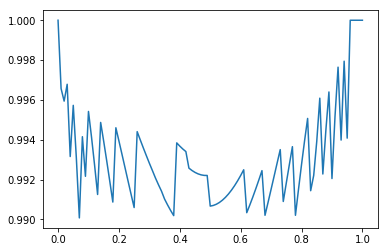

In [232]:
def compute_confidence(n, L, t, p):
    s = 0.0
    for i in range(n+1):
        if L[i] <= p and p <= L[i] + t:
            s += compute_possibility(n, p, i)
    return s
            

def test_bci(n, L, t, step):
    ret = min(compute_confidence(n, L, t, 0.0), compute_confidence(n, L, t, 1.0))
    p = step
    while p <= 1.0:
        tmp = compute_confidence(n, L, t, p)
        if tmp < ret:
            ret = tmp
        p += step
    return ret

def compute_and_test(n, c, step):
    L, R, t = compute_binomail_confidence_interval(n, c)
    ret = test_bci(n, L, t, step)
    print("result:", c, ret)
    return L, R, t
    
#compute_and_test(10, 0.9, 0.01)


n = 100
c = 0.99
steps = 100
L, R, t = compute_and_test(n, c, (1.0 / steps))
print("interval:", t)
x = [i * (1.0 / steps) for i in range(steps+1)]
y = [compute_confidence(n, L, t, i) for i in x]
#print(x, y)

plt.plot(x,y)
#for i,j in zip(x, y):
#    print(i,j)

In [235]:
print("n:", n, ", confidence:", c, ", interval:", t)
for i, l in enumerate(L):
    print(i, [l,  min(1.0, l + t)], i / n)

n: 100 , confidence: 0.99 , interval: 0.2486357706555722
0 [0.0, 0.2486357706555722] 0.0
1 [0.00010049830824171434, 0.24873626896381393] 0.01
2 [0.0014919182312307933, 0.25012768888680303] 0.02
3 [0.004394976455887101, 0.25303074711145934] 0.03
4 [0.008323646835074193, 0.2569594174906464] 0.04
5 [0.012968921327021932, 0.2616046919825942] 0.05
6 [0.01814745217378083, 0.2667832228293531] 0.06
7 [0.0237429993816704, 0.2723787700372426] 0.07
8 [0.029677054144699178, 0.2783128248002714] 0.08
9 [0.03589383548518482, 0.28452960614075706] 0.09
10 [0.0423520923639647, 0.29098786301953694] 0.1
11 [0.04902032714937926, 0.2976560978049515] 0.11
12 [0.055873856167765024, 0.30450962682333726] 0.12
13 [0.06289291616068443, 0.3115286868162567] 0.13
14 [0.07006139679895235, 0.3186971674545246] 0.14
15 [0.07736596426527924, 0.32600173492085144] 0.15
16 [0.08479543819182471, 0.3334312088473969] 0.16
17 [0.09234033797522138, 0.3409761086307936] 0.17
18 [0.09999254546188091, 0.34862831611745315] 0.18
19 [0